In [3]:
pip install seaborn bioinfokit yellowbrick statsmodels


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [287]:
import pandas as pd #Used for data manipulation and analysis.
import numpy as np #Used for numerical operations.
import seaborn as sns #A statistical data visualization library based on matplotlib.
import matplotlib.pyplot as plt  #A plotting library for creating static, animated, and interactive visualizations.
from sklearn.preprocessing import LabelEncoder #Used to convert categorical labels to numerical labels.
from sklearn.decomposition import PCA  #Principal Component Analysis, a technique to reduce the dimensionality of data.
from sklearn import preprocessing   #Provides several common utility functions and transformer classes to change raw feature vectors into a suitable form for modeling.
from bioinfokit.visuz import cluster  #isualization tool for clustering.
from sklearn.cluster import KMeans  #K-Means clustering algorithm.
from yellowbrick.cluster import KElbowVisualizer  #Visualizer to help in finding the optimal number of clusters using the "elbow method".
from collections import Counter  #Used for counting hashable objects
from statsmodels.graphics.mosaicplot import mosaic #Used to create mosaic plots.
from itertools import product #Used to compute the Cartesian product of input iterables.

In [288]:
df = pd.read_csv("C:/Users/user/Downloads/mcdonalds.csv")
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [289]:
df.shape

(1453, 15)

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [291]:
df['Like'].value_counts()

Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64

In [292]:
df['Age'].value_counts()

Age
55    53
60    38
37    37
59    36
57    36
52    36
58    35
36    35
49    34
62    34
50    34
32    33
44    32
56    32
64    32
53    31
26    31
24    30
35    30
51    30
47    30
42    30
23    30
39    29
29    28
34    28
30    28
38    27
40    27
31    27
25    26
33    26
61    26
67    26
48    26
43    25
27    25
63    25
54    24
41    23
22    23
65    23
45    22
20    21
46    19
28    18
66    17
21    16
18    16
70    15
69    14
68    13
19    10
71     1
Name: count, dtype: int64

In [293]:
df['VisitFrequency'].value_counts()

VisitFrequency
Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: count, dtype: int64

In [294]:
df['Gender'].value_counts()

Gender
Female    788
Male      665
Name: count, dtype: int64

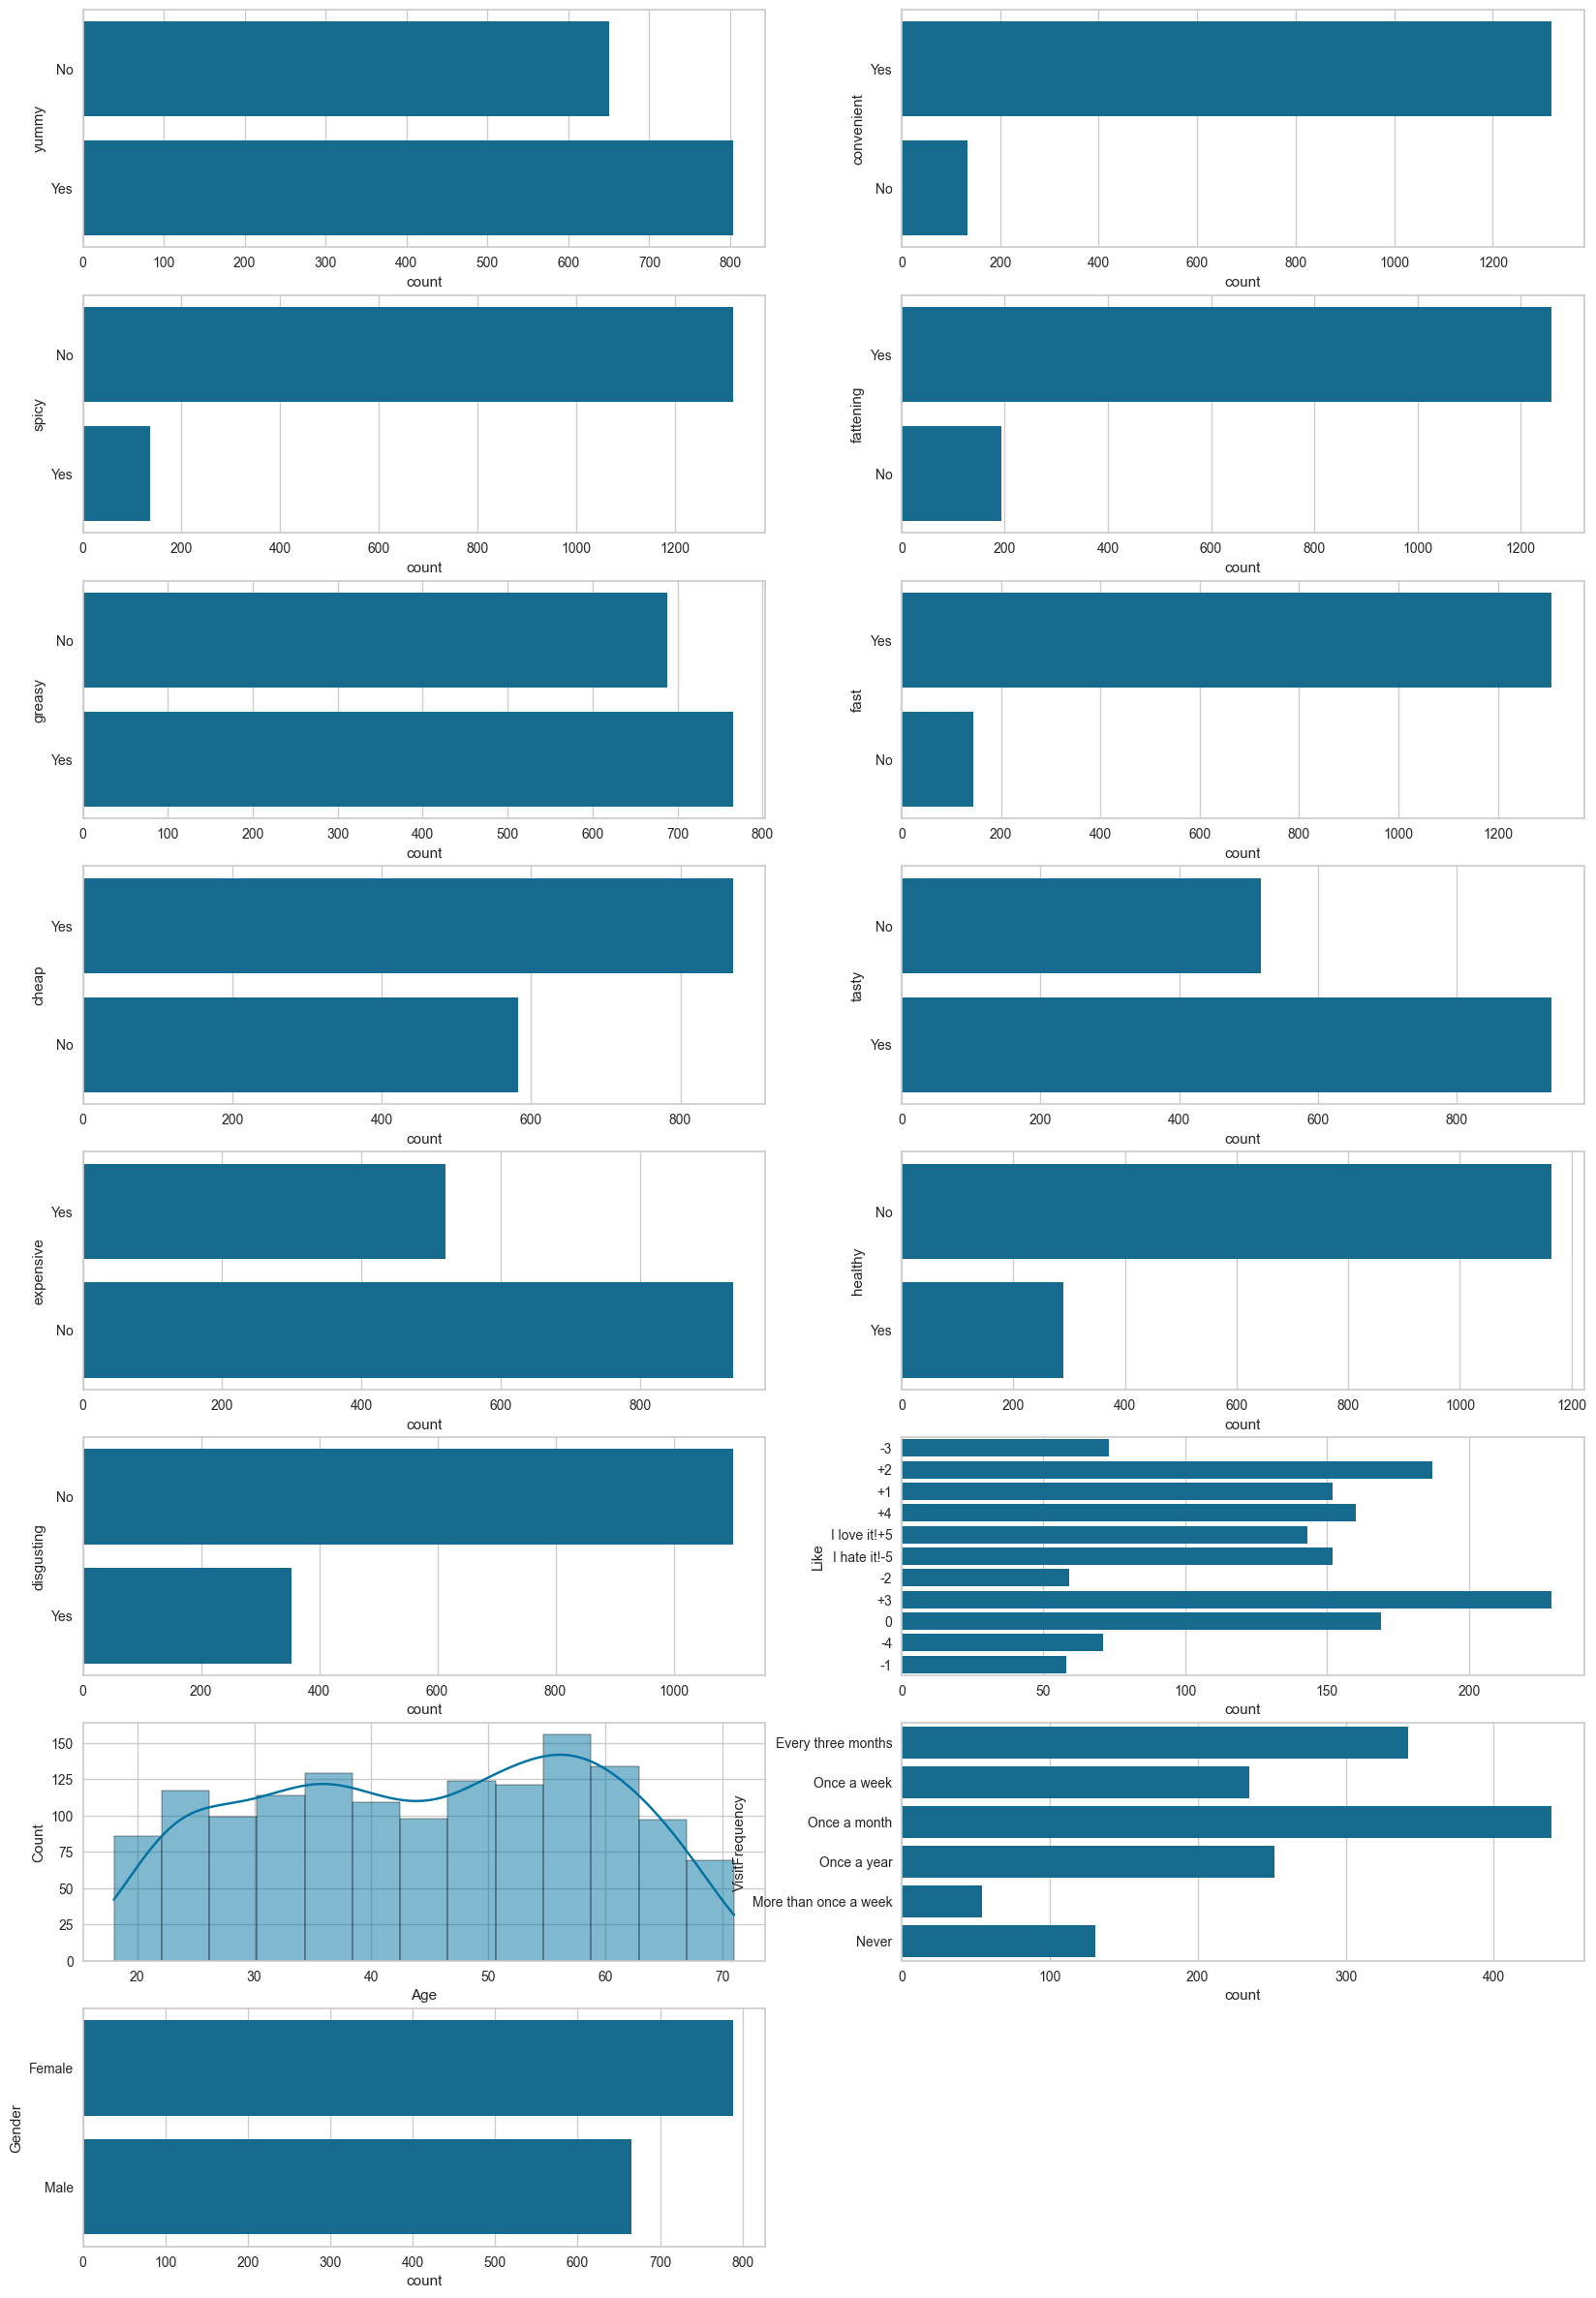

     Age
Age  1.0


In [193]:
# Define a function to perform EDA
def EDA(df, figuresize):
    cat = []
    con = []
    from warnings import filterwarnings
    filterwarnings("ignore")
    u = int((df.shape[1] + 1) / 2)
    plt.figure(figsize=figuresize)
    x = 1

    for i in df.columns:
        try:
            df[i].astype(float)
            con.append(i)
            plt.subplot(u, 2, x)
            x = x + 1
            sns.histplot(df[i], kde=True)
        except ValueError:
            cat.append(i)
            plt.subplot(u, 2, x)
            x = x + 1
            sns.countplot(df[i])
    
    plt.show()
    print(df.corr(numeric_only=True))

# Apply the function on the dataset
EDA(df, (20, 30))

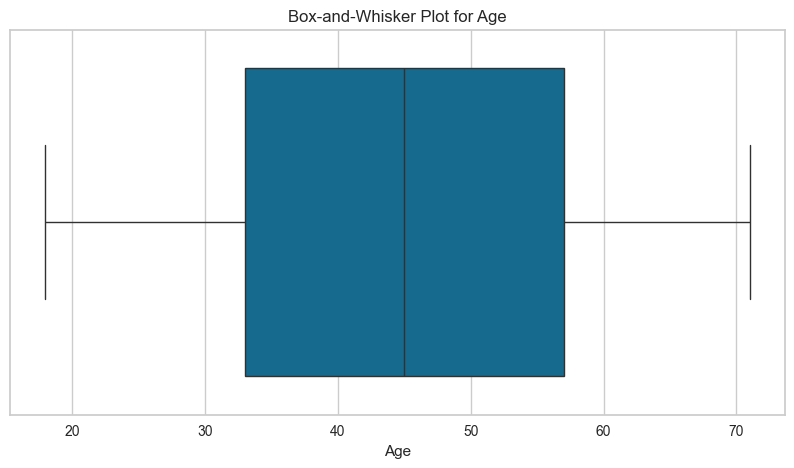

In [16]:
# Plotting the box-and-whisker plot for the 'Age' variable
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Age'], orient='h')
plt.xlabel('Age')
plt.title('Box-and-Whisker Plot for Age')
plt.show()

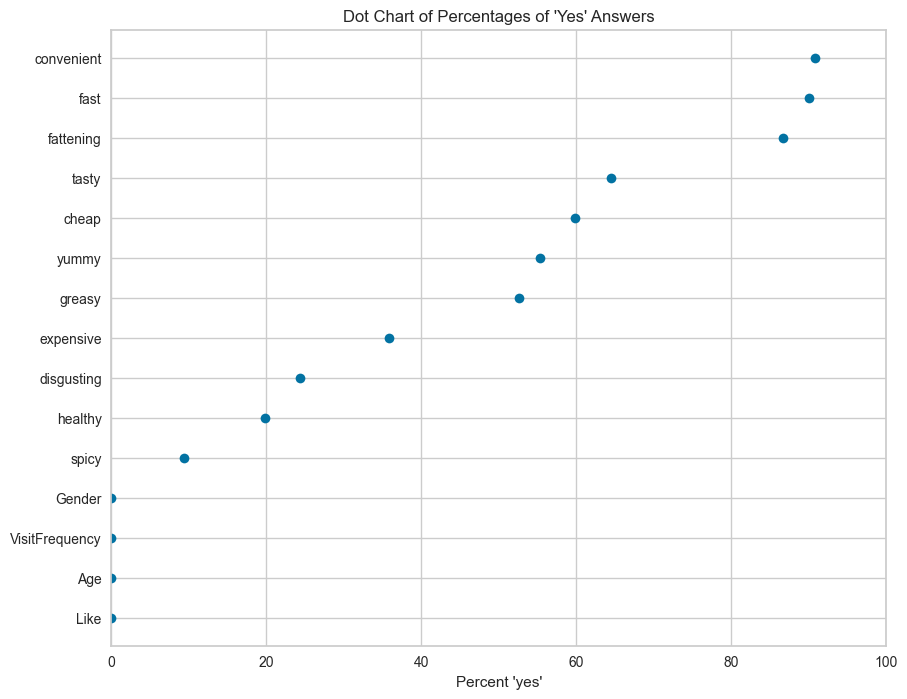

In [194]:
# Assuming the columns from 13 to 32 are the relevant columns for 'yes' answers (0-based index)
columns_of_interest = df.columns[:32]

# Calculate the percentage of 'yes' responses for each of these columns
yes_percentages = 100 * df[columns_of_interest].apply(lambda col: np.mean(col == "Yes"))

# Sort the percentages
yes_percentages_sorted = yes_percentages.sort_values()

# Plot the dot chart
plt.figure(figsize=(10, 8))
plt.plot(yes_percentages_sorted.values, yes_percentages_sorted.index, 'o')
plt.xlabel("Percent 'yes'")
plt.xlim(0, 100)
plt.title("Dot Chart of Percentages of 'Yes' Answers")
plt.grid(True)
plt.show()

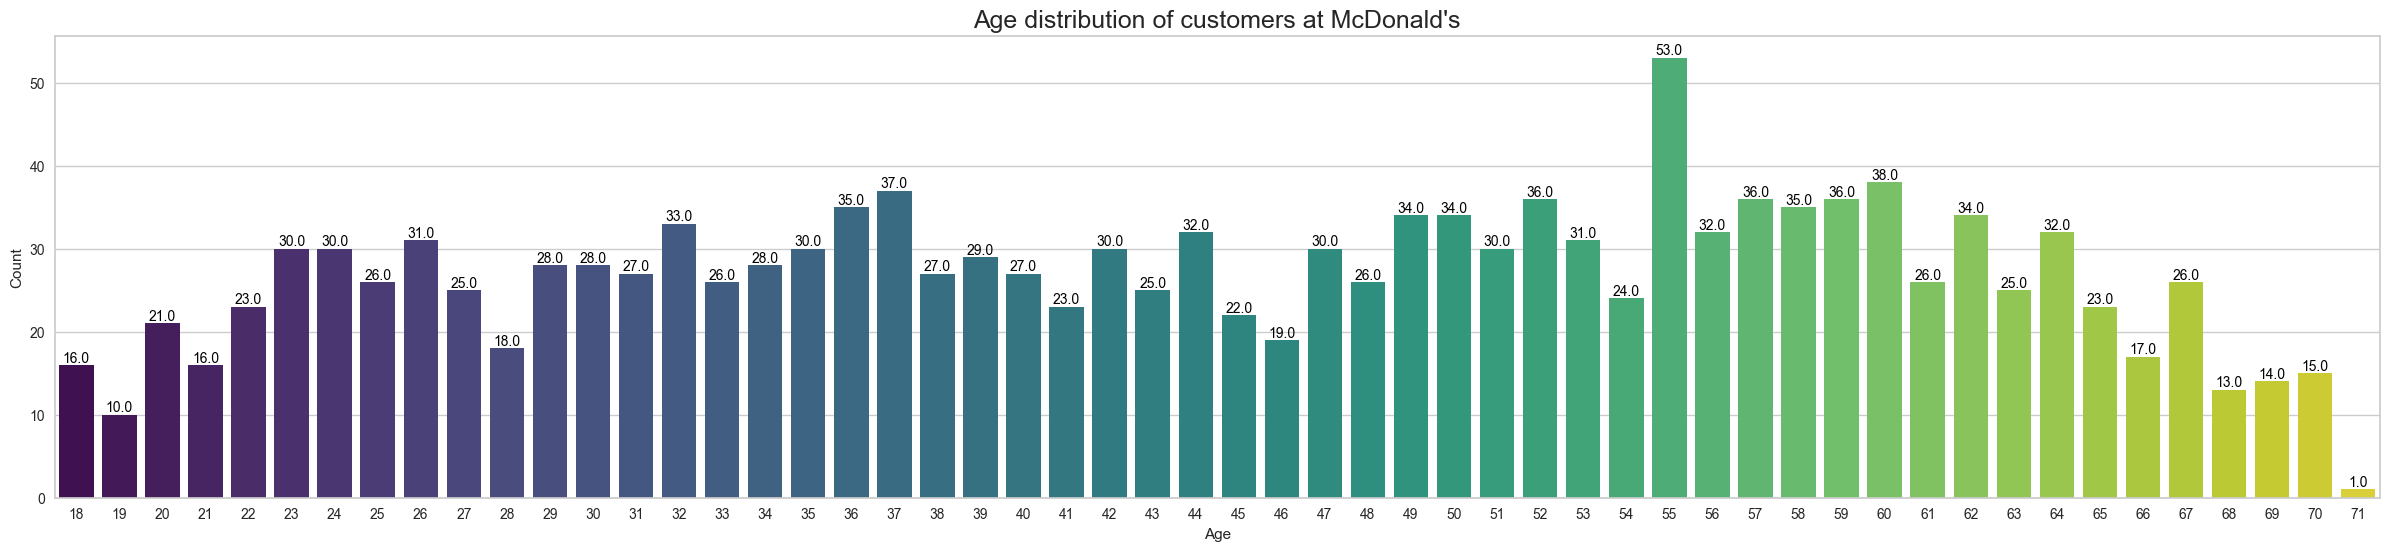

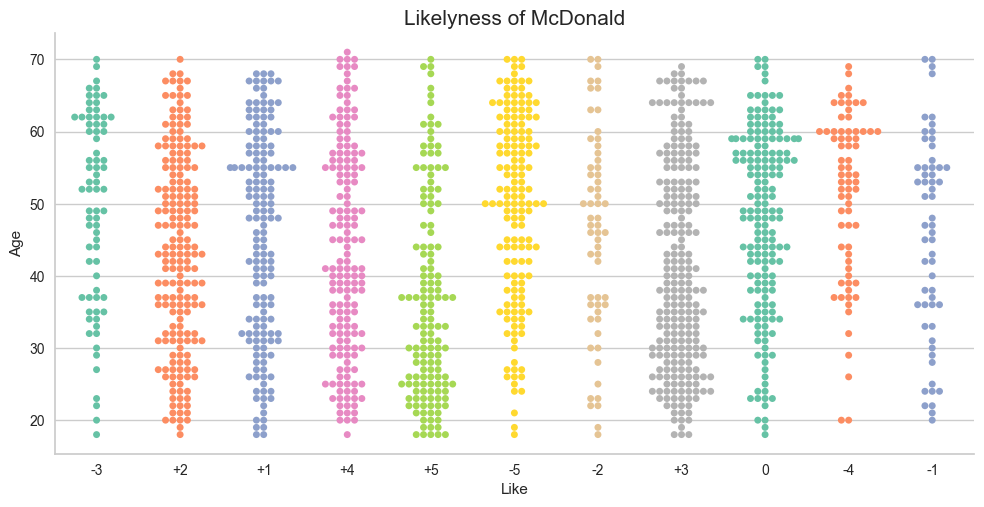

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure df['Age'] is in a suitable format for plotting
# For example, if 'Age' is numeric, convert it to categorical bins
# Example binning:
# df['Age'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['0-20', '20-30', '30-40', '40-50', '50-60', '60+'])

# Set figure size
plt.figure(figsize=(30, 6))

# Plotting the age distribution
sns.countplot(x='Age', data=df, palette='viridis')

# Adding labels and title
plt.title('Age distribution of customers at McDonald\'s', fontsize=18)
plt.xlabel('Age')
plt.ylabel('Count')

# Adding annotations (counts on top of bars)
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show plot
plt.show()

# renaming the category for convinence 
df['Like'] = df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})

# plotting the results
sns.catplot(data=df, x="Like", y="Age", orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald', fontsize=15)
plt.show()

In [197]:
df_new = df.drop(labels=['Like','Age','VisitFrequency','Gender'], axis=1) 

In [198]:
df_MCD.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [199]:
df_encoded = df_MCD.apply(LabelEncoder().fit_transform)
df_encoded.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [200]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [201]:
MDC = df.iloc[:, 0:11]
MDC = (MDC == "Yes").astype(int)
# Calculate the mean of each column and round to two decimal places.. 
rounded_col_means = MDC.mean().round(2)    
rounded_col_means

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [101]:
# applying scaling and PCA
pca_data = preprocessing.scale(df_encoded)
pca = PCA(n_components=11)
pc = pca.fit_transform(pca_data)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,-0.704334,0.437016,-0.268698,-0.872074,1.521184,-0.470160,0.030969,0.687116,-0.367598,-0.321161,1.701170
1,0.467820,-0.364277,1.596835,-0.004835,-0.462385,0.449321,-0.087351,-0.446003,-0.221855,-0.191268,1.467681
2,-0.191986,-1.712949,0.339413,3.368168,1.266802,-0.148058,0.606634,0.668576,-1.377226,1.259300,-0.128530
3,0.116991,1.155122,1.003913,0.469589,-1.141750,0.857182,-0.015843,-0.390275,1.578539,-0.092189,-0.233201
4,0.034724,1.390267,-0.792275,0.473031,0.270488,0.847963,1.804085,0.700019,-1.630339,-0.092449,-0.033144


In [103]:
# standard deviations reflect the importance of each principal component
std_dev = np.round(np.sqrt(pca.explained_variance_), 1)
print("Standard Deviation:\n",std_dev)

Standard Deviation:
 [1.7 1.3 1.2 1.  1.  0.9 0.8 0.8 0.7 0.6 0.5]


In [108]:
#Rotation Matrix
rotation_matrix = np.round(pca.components_, 3)*-1

df=pd.DataFrame(rotation_matrix.T) 
df.columns=names
name = [
    'yummy', 'convenient', 'spicy', 'fattening', 'greasy', 
    'fast', 'cheap', 'tasty', 'expensive', 'healthy', 
    'disgusting'
]
df.index=name
df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
yummy,-0.407,0.283,-0.260,-0.026,0.347,-0.125,0.160,0.017,-0.195,0.691,0.092
convenient,-0.309,-0.046,-0.317,0.009,-0.437,0.189,-0.662,0.150,-0.337,0.029,-0.021
spicy,-0.023,0.070,0.020,-0.845,-0.186,0.439,0.214,-0.028,0.025,0.058,0.042
fattening,0.178,-0.206,-0.608,0.023,0.087,0.108,-0.024,-0.720,0.105,-0.020,0.075
greasy,0.268,-0.136,-0.390,-0.331,0.344,-0.278,-0.307,0.487,0.346,-0.015,0.031
fast,-0.213,-0.282,-0.211,-0.090,-0.569,-0.573,0.392,0.056,0.099,0.018,0.054
cheap,-0.289,-0.575,0.125,-0.114,0.257,0.021,-0.009,-0.065,-0.062,0.060,-0.692
tasty,-0.426,0.242,-0.270,-0.073,0.286,-0.053,0.197,0.059,-0.214,-0.713,-0.006
expensive,0.291,0.568,-0.183,-0.036,-0.207,-0.171,0.015,-0.062,-0.010,0.030,-0.694
healthy,-0.267,0.201,0.368,-0.302,0.052,-0.446,-0.449,-0.446,0.219,-0.055,0.090


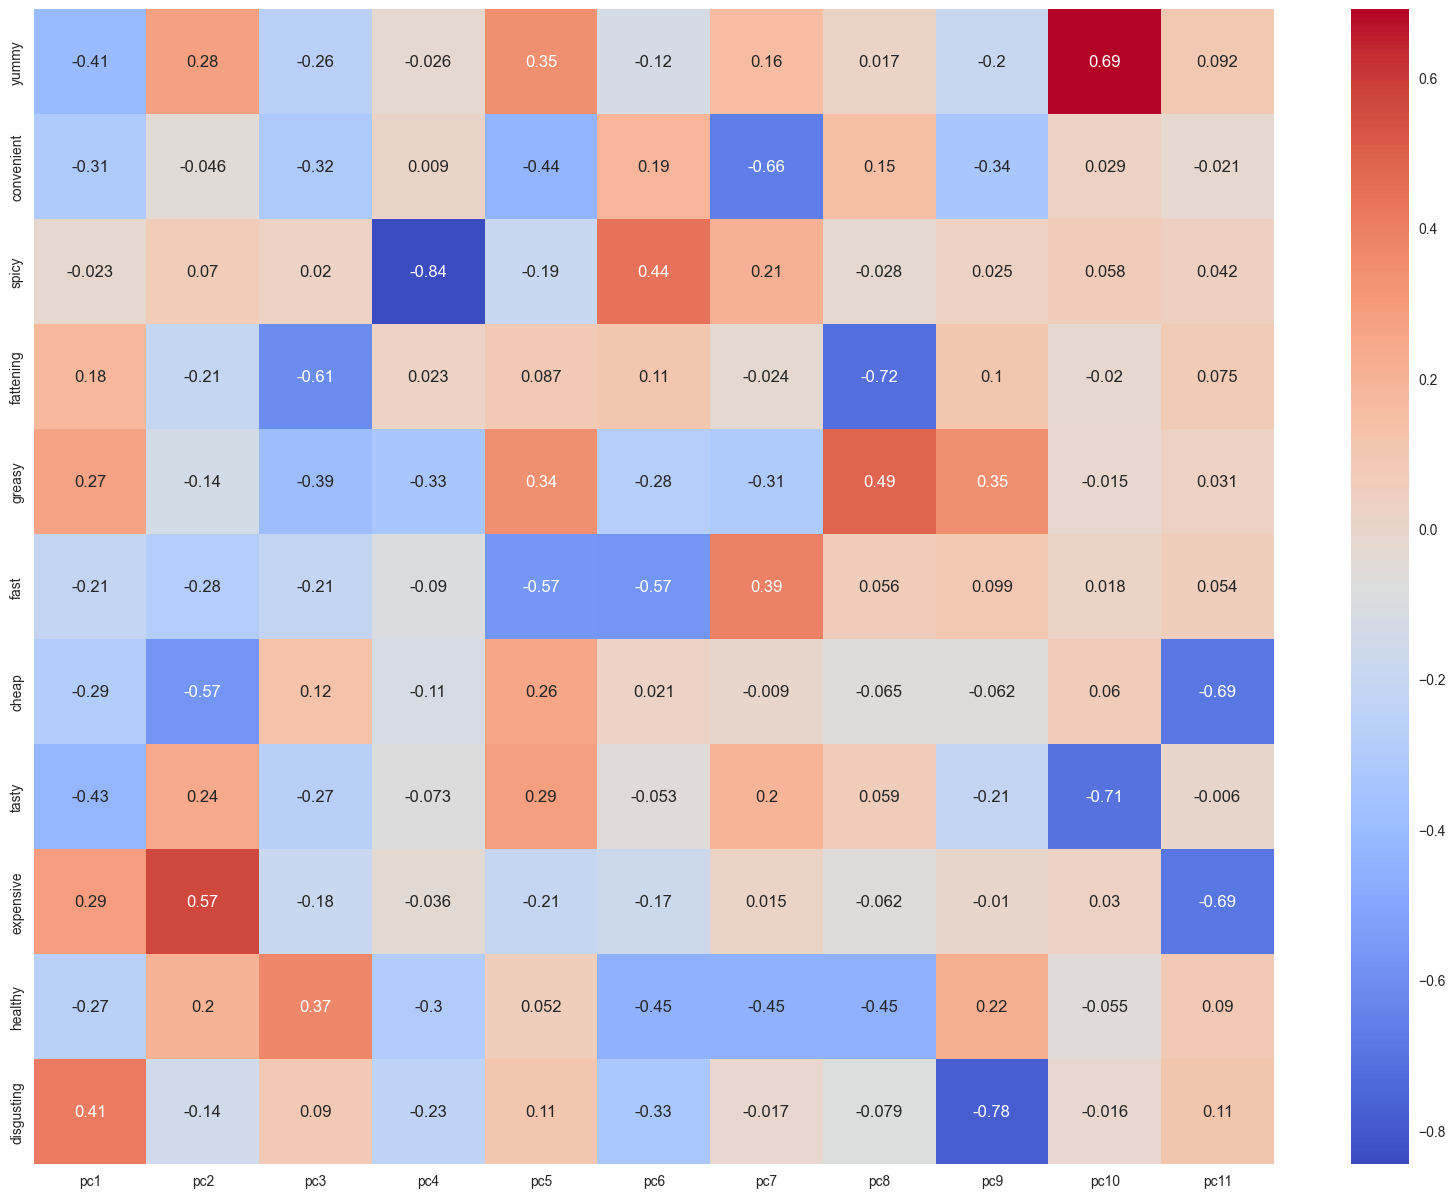

In [122]:
# correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(df, annot=True, cmap='coolwarm')
plt.show()

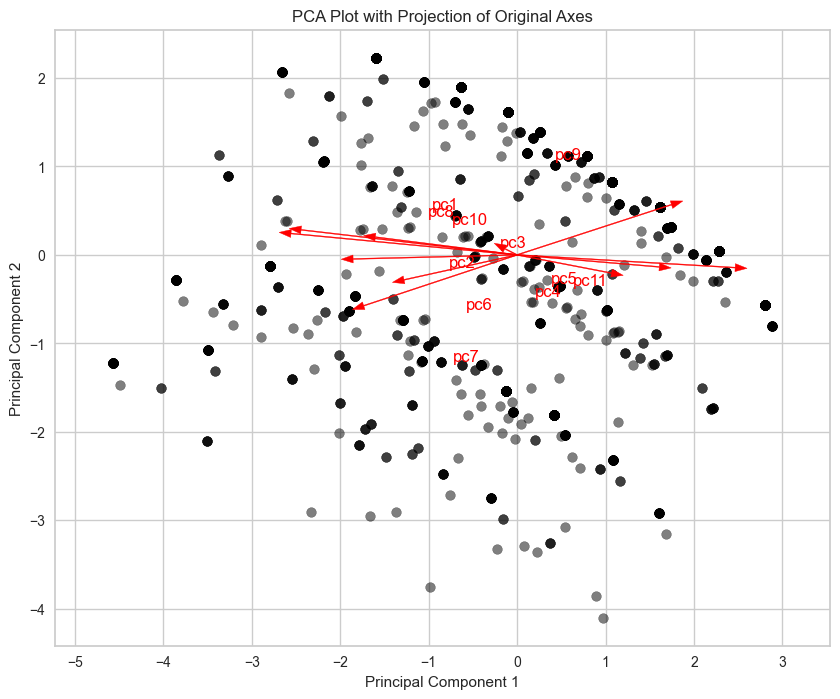

In [182]:
# Plotting the PCA scores
plt.figure(figsize=(10, 8))
plt.scatter(pca_scores[:, 0], pca_scores[:, 1], color='black', alpha=0.5)




# Adding the projection of the original axes (loadings)
for i, component in enumerate(rotation_matrix.T):
    arrow_length = 6
    plt.arrow(0, 0, component[0]*arrow_length, component[1], color='red', width=0.01, head_width=0.09)
    plt.text(component[0]* 2, component[1] * 2,
             names[i], color='red', ha='center', va='center')  # Adding component name

# Setting up the plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot with Projection of Original Axes')
plt.grid(True)
plt.axis('equal')  # Ensuring the scale is the same on both axes
plt.show()

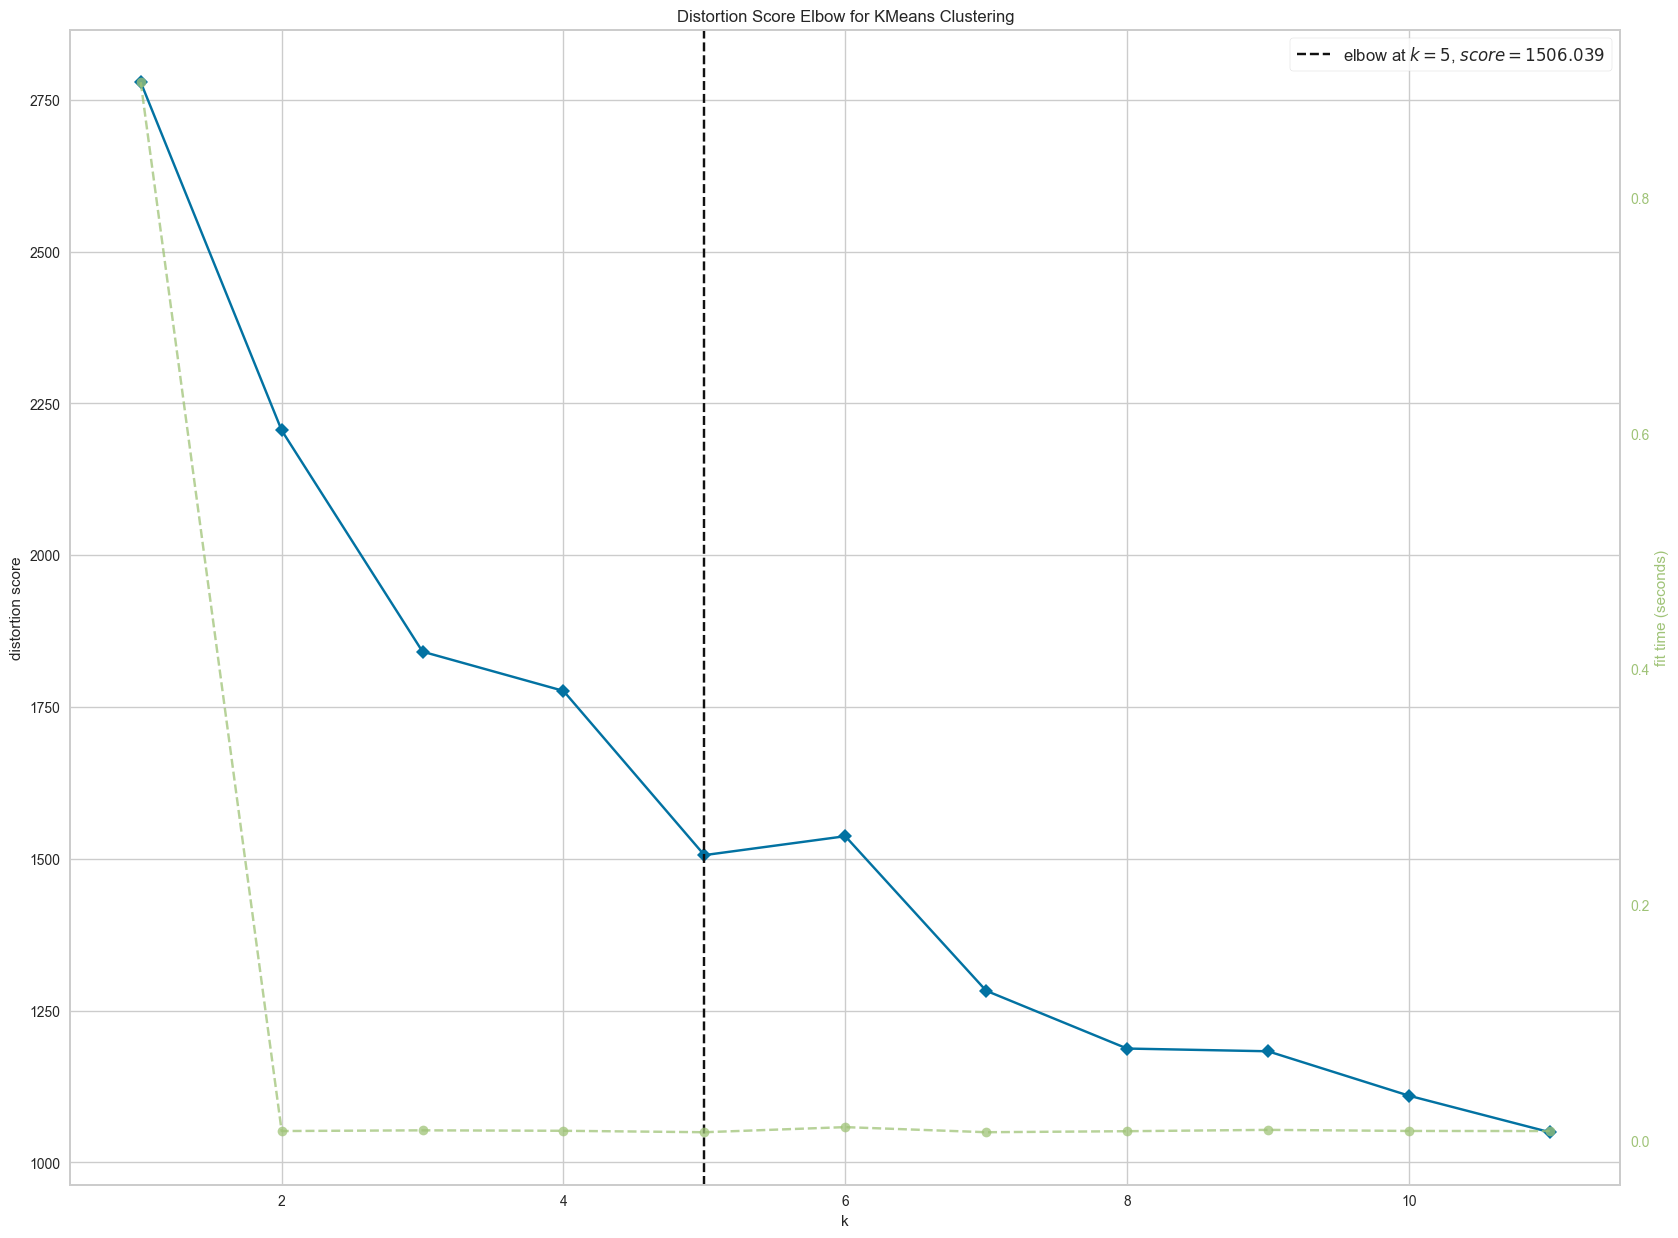

In [179]:
# using k-means clustering analysis for extracting segments
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_encoded)
visualizer.show();

In [ ]:
 Using k-Means

Labels assigned to each data point: [3 1 1 ... 1 0 3]
Within-cluster sum of squares (WCSS): 15779.386322315517
Number of iterations: 10
Cluster centroids:
 [[ 0.31691704  0.08308955  0.12731241 -2.55509245 -0.88378111  0.08651243
   0.1810445   0.32783026 -0.29615785  0.99629315 -0.48699692 -0.01656564
   0.39308632 -0.06242339  0.09636197]
 [ 0.47661864  0.24497618  0.11827258  0.36442587  0.19728341 -0.07392685
  -0.97900548  0.45663917  1.16141221 -0.05528839 -0.2536927  -0.3122327
  -0.37903661 -0.09597423  0.11555503]
 [ 0.2637164   0.2844027  -0.08261397  0.39137527 -0.12601856  0.2335218
   0.69024884  0.33859773 -0.74309964 -0.0212978  -0.45067301 -0.27370341
  -0.09344673  0.00627545 -0.13769612]
 [-1.07650151 -0.77320342 -0.03275812  0.27180847  0.48391806 -0.38268216
  -0.37002995 -1.19417044  0.34786307 -0.41840329  1.27863525  0.78447751
   0.32342794  0.11210345  0.0820484 ]]
Cluster sizes: Counter({2: 604, 3: 345, 1: 328, 0: 176})


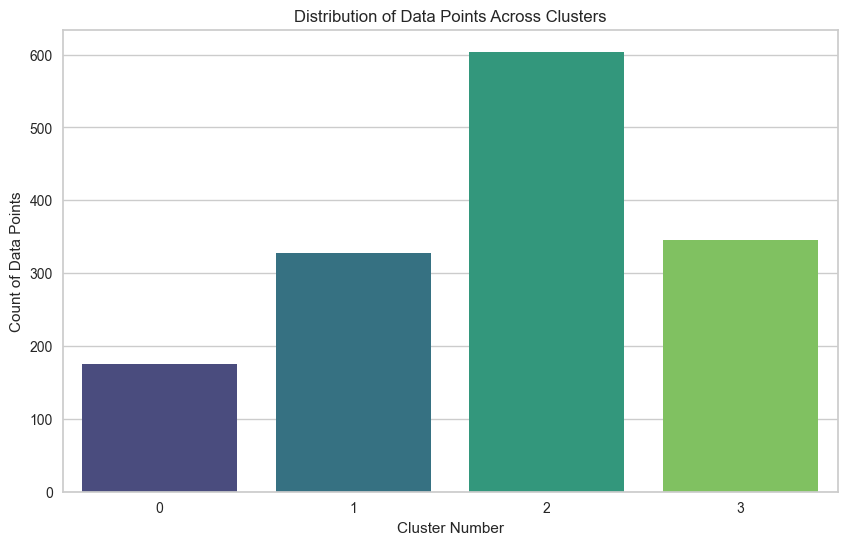

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from collections import Counter



# Encode categorical variables
label_encoders = {}
categorical_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
                       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'VisitFrequency', 'Gender']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Handle missing values if any (e.g., fillna, dropna)
df = df.dropna()

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Perform k-means clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=0)
kmeans.fit(df_scaled)

# Add the cluster labels to the original dataframe
df['cluster_num'] = kmeans.labels_

# Output the results
print('Labels assigned to each data point:', kmeans.labels_)
print('Within-cluster sum of squares (WCSS):', kmeans.inertia_)
print('Number of iterations:', kmeans.n_iter_)
print('Cluster centroids:\n', kmeans.cluster_centers_)
print('Cluster sizes:', Counter(kmeans.labels_))

# Plotting the distribution of data points across clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster_num', data=df, palette='viridis')
plt.xlabel('Cluster Number')
plt.ylabel('Count of Data Points')
plt.title('Distribution of Data Points Across Clusters')
plt.show()




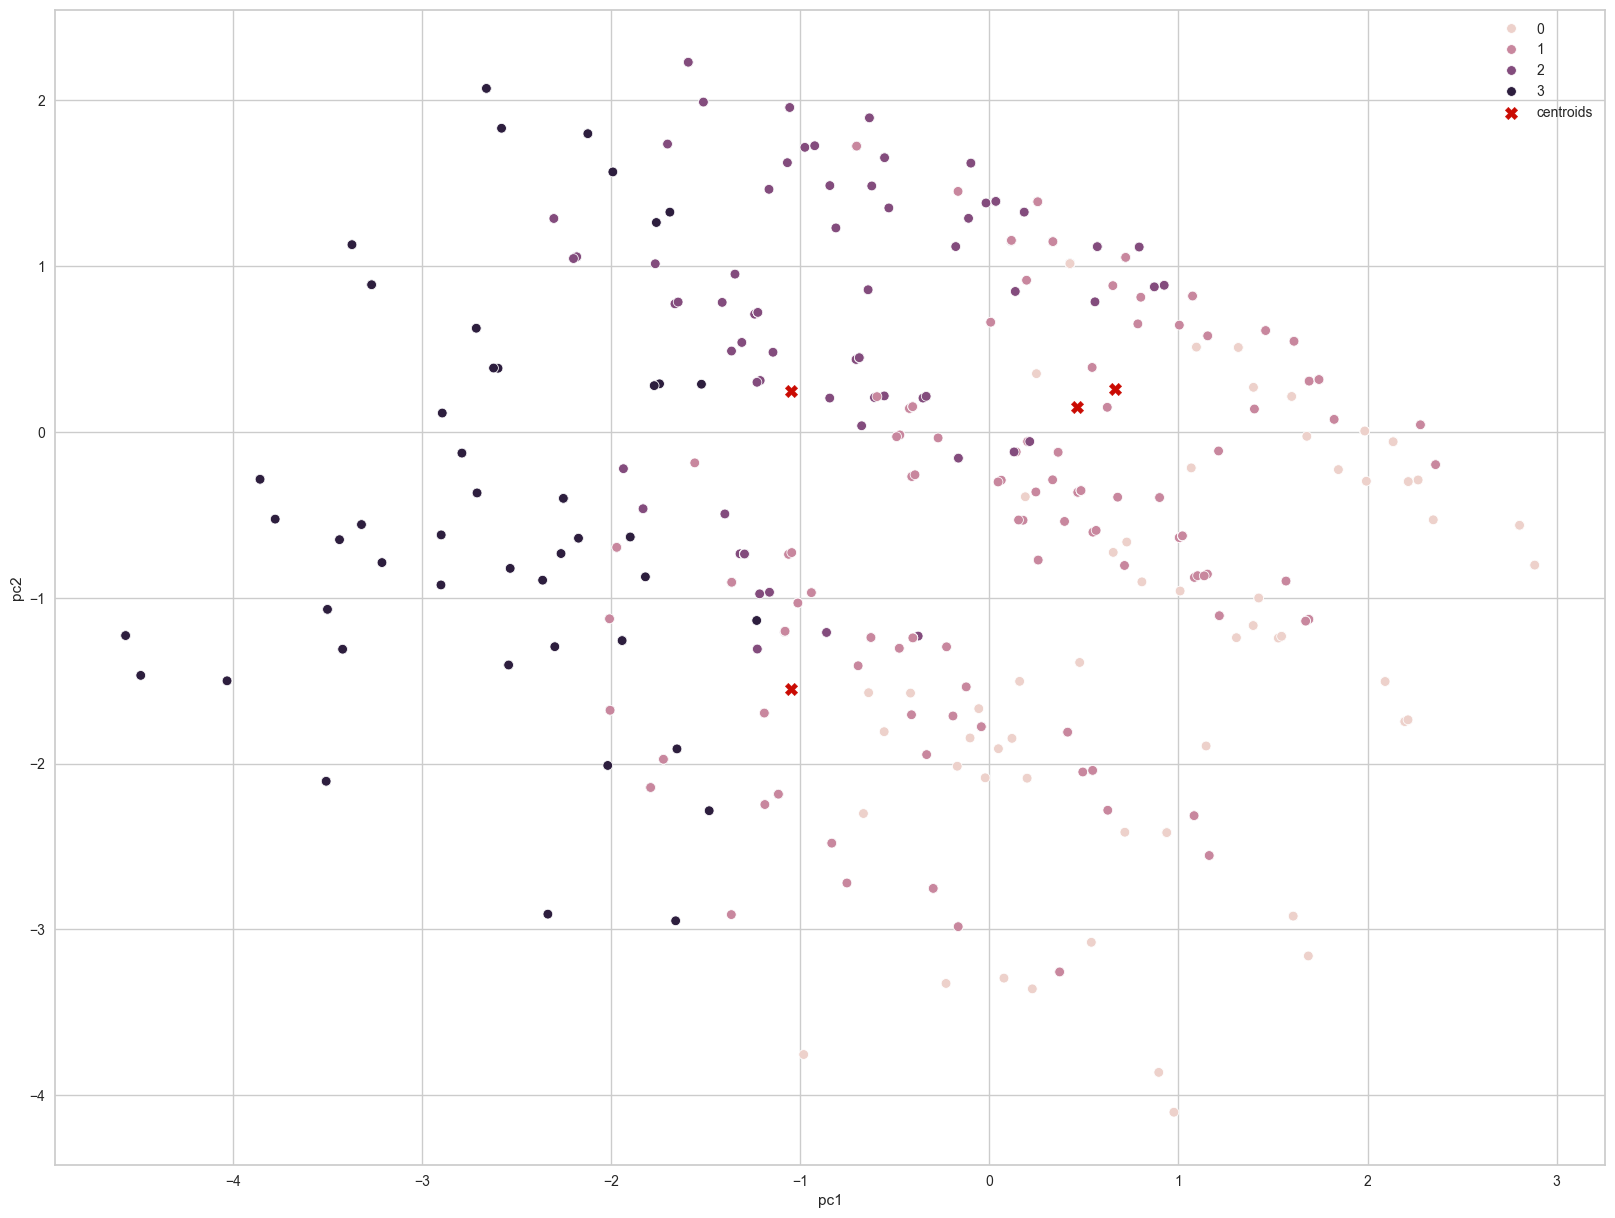

In [219]:
# cluster visualization
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

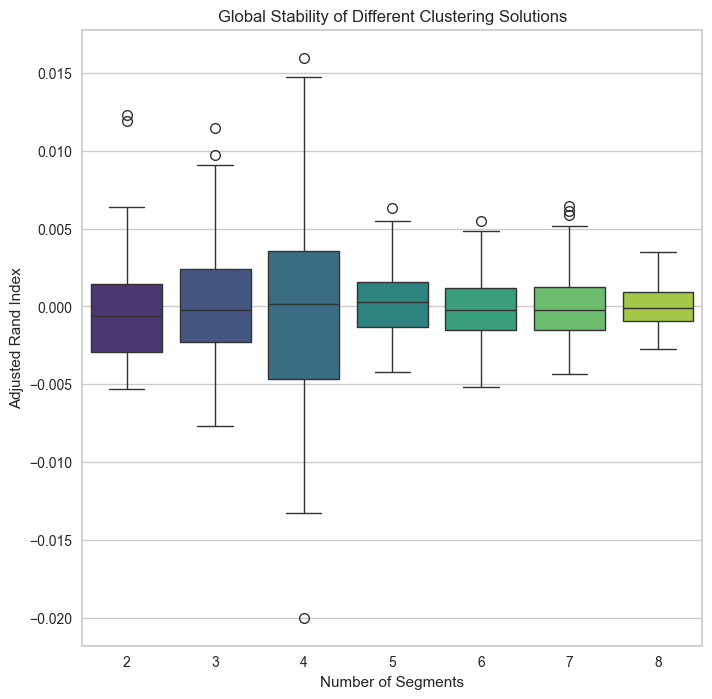

In [221]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns



# Encode categorical variables
label_encoders = {}
categorical_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
                       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'VisitFrequency', 'Gender']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Handle missing values if any (e.g., fillna, dropna)
df = df.dropna()

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Function to perform k-means clustering and calculate adjusted Rand index
def calculate_stability(n_clusters, nboot=100, nrep=10):
    rand_indices = []

    for _ in range(nboot):
        # Bootstrap sample
        boot_sample = resample(df_scaled, replace=True, n_samples=len(df_scaled))
        
        # Cluster the original data
        kmeans_orig = KMeans(n_clusters=n_clusters, n_init=nrep, random_state=0)
        labels_orig = kmeans_orig.fit_predict(df_scaled)
        
        # Cluster the bootstrap sample
        kmeans_boot = KMeans(n_clusters=n_clusters, n_init=nrep, random_state=0)
        labels_boot = kmeans_boot.fit_predict(boot_sample)
        
        # Calculate adjusted Rand index
        ari = adjusted_rand_score(labels_orig, labels_boot)
        rand_indices.append(ari)
    
    return rand_indices

# Calculate stability for 2 to 8 clusters
stability_results = {}
for k in range(2, 9):
    stability_results[k] = calculate_stability(n_clusters=k)

# Create a boxplot of the stability results
plt.figure(figsize=(8, 8))
sns.boxplot(data=pd.DataFrame(stability_results), palette="viridis")
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability of Different Clustering Solutions')
plt.show()


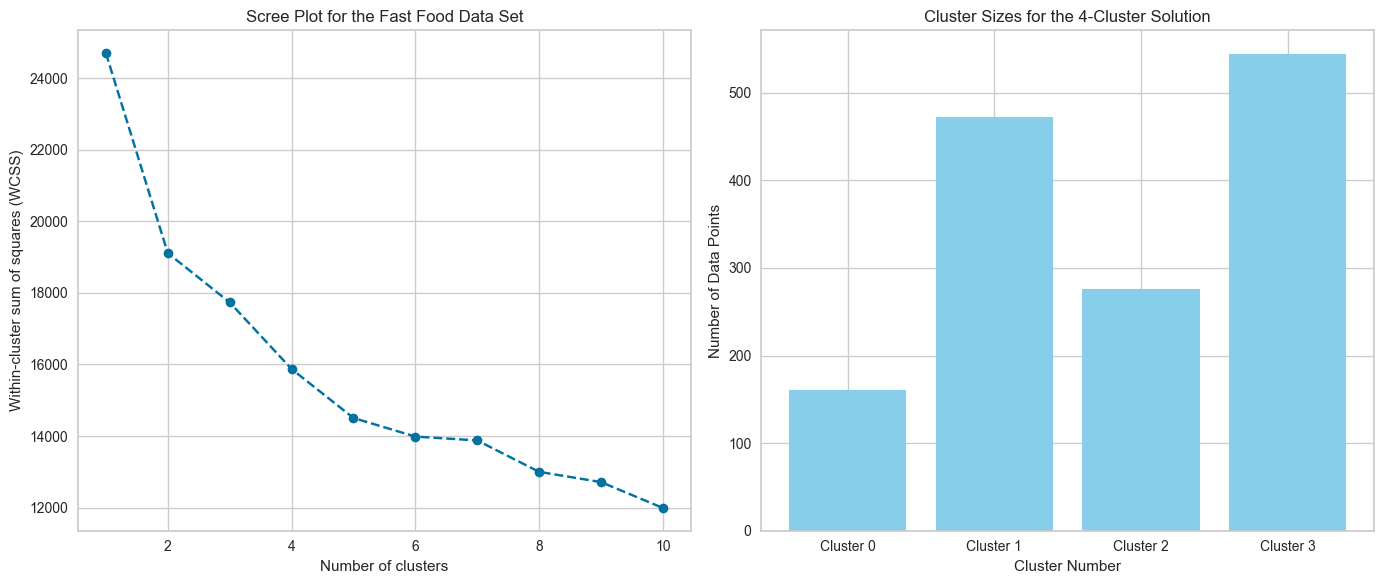

In [231]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter



# Encode categorical variables
label_encoders = {}
categorical_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
                       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'VisitFrequency', 'Gender']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Handle missing values if any (e.g., fillna, dropna)
df = df.dropna()

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Fit k-means models for different numbers of clusters to create a scree plot
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Scree plot
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Scree Plot for the Fast Food Data Set')

# Fit k-means model for 4 clusters
kmeans_4 = KMeans(n_clusters=4, init='k-means++', random_state=0)
df['cluster'] = kmeans_4.fit_predict(df_scaled)

# Bar chart for cluster sizes
cluster_sizes = Counter(kmeans_4.labels_)

plt.subplot(1, 2, 2)
plt.bar(cluster_sizes.keys(), cluster_sizes.values(), color='skyblue')
plt.xlabel('Cluster Number')
plt.ylabel('Number of Data Points')
plt.title('Cluster Sizes for the 4-Cluster Solution')
plt.xticks(range(4), [f'Cluster {i}' for i in range(4)])

plt.tight_layout()
plt.show()


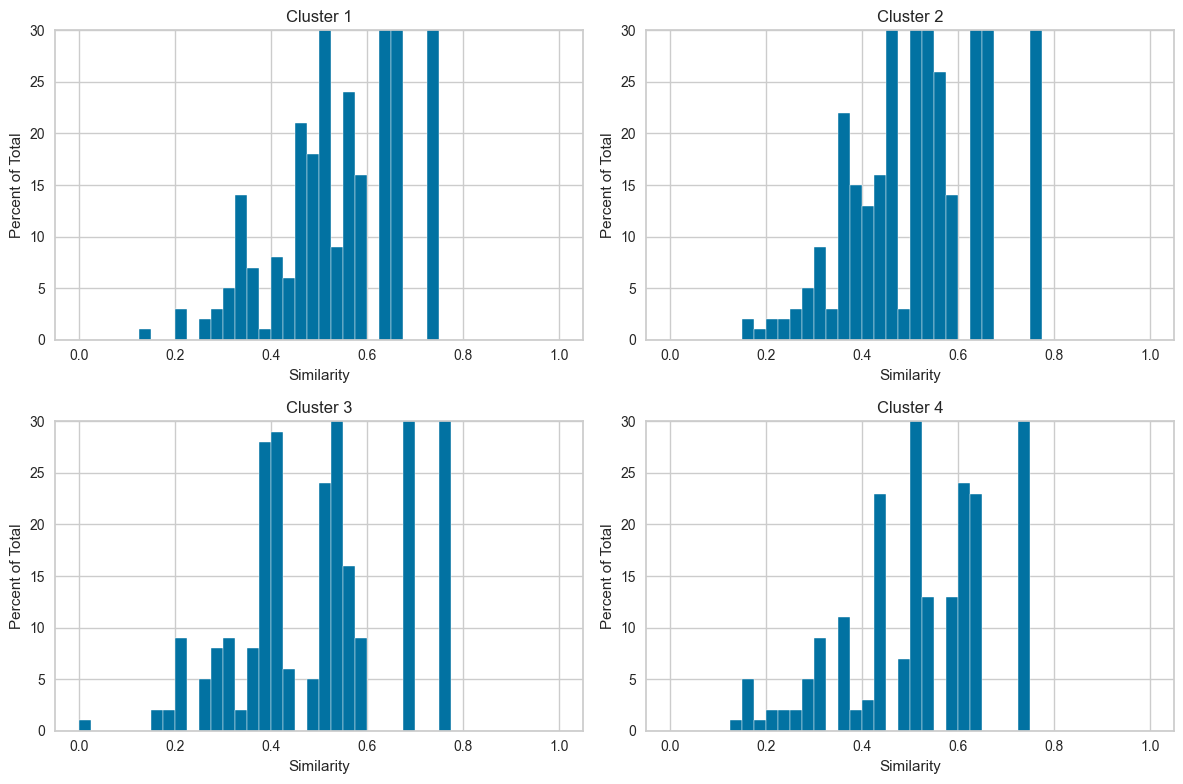

In [261]:
np.random.seed(1234)
data = MDC  

# Perform k-means clustering for 4 segments
kmeans = KMeans(n_clusters=4, n_init=10, random_state=0)
kmeans.fit(data)

# Assign each data point to the nearest cluster and calculate the distance from the centroid
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# We will calculate the euclidean distance from each point to its cluster centroid
distances = np.sqrt(((data - centroids[labels]) ** 2).sum(axis=1))

# Normalize distances to a similarity score between 0 and 1 for the sake of the example
similarities = 1 - (distances / np.max(distances))

# Create subplots for each cluster
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()  

for i in range(4):
    cluster_similarities = similarities[labels == i]
    axes[i].hist(cluster_similarities, bins=40, range=(0,1), edgecolor='white')
    axes[i].set_title(f'Cluster {i+1}')
    axes[i].set_xlabel('Similarity')
    axes[i].set_ylabel('Percent of Total')
    axes[i].set_ylim(0, 30) 
    
# Adjust the layout
plt.tight_layout()
plt.show()

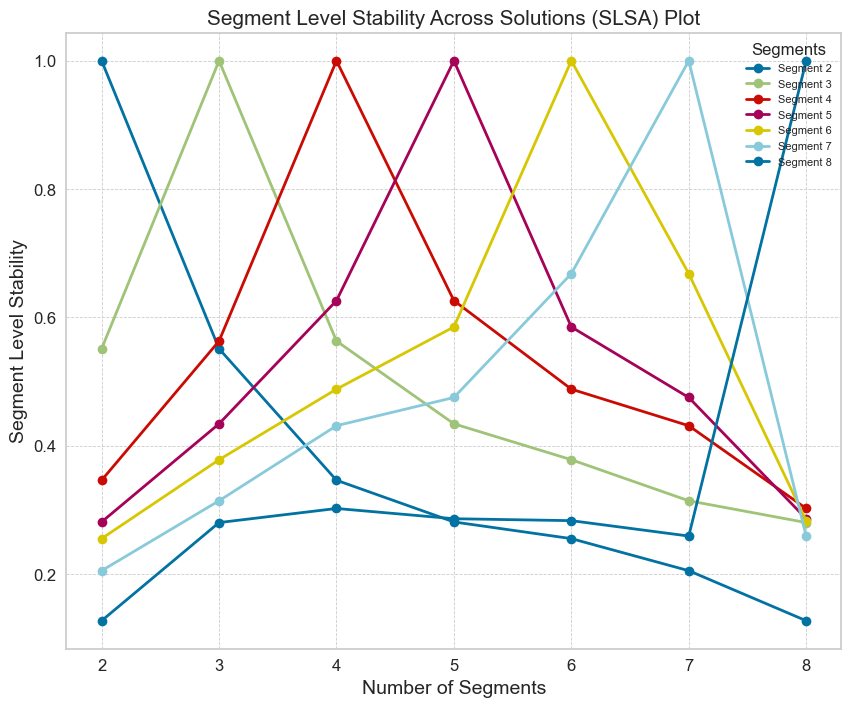

In [280]:
# Simulated data 
np.random.seed(1234)
num_samples = 1000
num_features = 10
data = np.random.rand(num_samples, num_features) 

# Calculate segment stability
segment_stability_final = []

for segment in range(2, 9):
    kmeans = KMeans(n_clusters=segment, random_state=42)
    labels = kmeans.fit_predict(data)
    segment_stability_final.append(labels)

# Plotting SLSA with cleaned and verified data
plt.figure(figsize=(10, 8))

for i, segment in enumerate(range(2, 9)):
    stability_scores = [np.mean(segment_stability_final[i] == labels) for labels in segment_stability_final]
    plt.plot(range(2, 9), stability_scores, marker='o', label=f'Segment {segment}', linewidth=2)

plt.xlabel('Number of Segments', fontsize=14)
plt.ylabel('Segment Level Stability', fontsize=14)
plt.title('Segment Level Stability Across Solutions (SLSA) Plot', fontsize=15)
plt.xticks(list(range(2, 9)), fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Segments', fontsize=8)
plt.grid(True, linestyle='--', linewidth=0.6)

plt.show()

In [298]:
#Using Visualisations to Describe Market Segments
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0)
kmeans.fit(df_encoded)
df['cluster_num']= kmeans.labels_  # Add cluster membership to the DataFrame

# Display cluster sizes
print('Cluster sizes:', Counter(kmeans.labels_))

Cluster sizes: Counter({3: 501, 1: 267, 4: 253, 5: 186, 0: 125, 2: 121})


In [299]:
df['Gender'] = df['Gender'].astype('category')
df['cluster_num'] = df['cluster_num'].astype('category')

In [300]:
# Cross-tabulation of Gender across market segments
C6_Gender = pd.crosstab(df['cluster_num'], df['Gender'], rownames=['Segment number'], colnames=['Gender'])
print(C6_Gender)


Gender            0    1
Segment number          
0                48   77
1               135  132
2                69   52
3               307  194
4               151  102
5                78  108


<Figure size 1000x600 with 0 Axes>

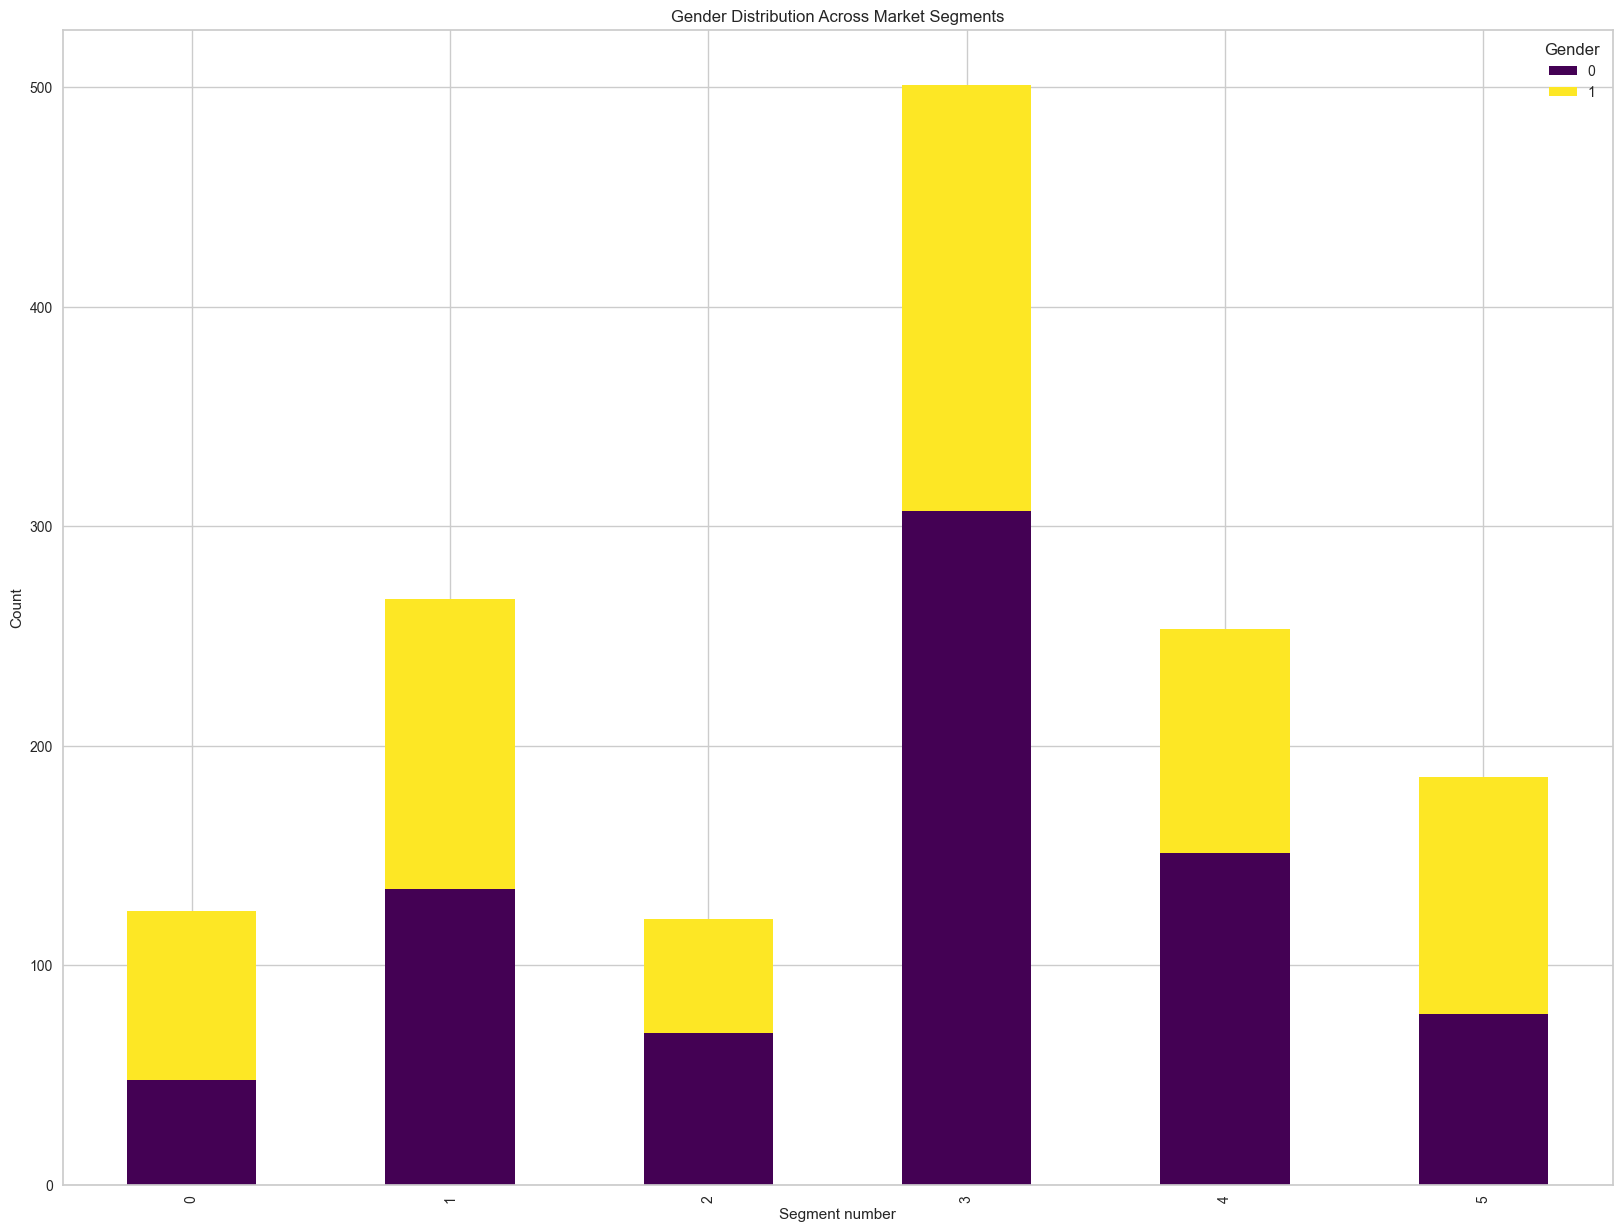

<Figure size 800x500 with 0 Axes>

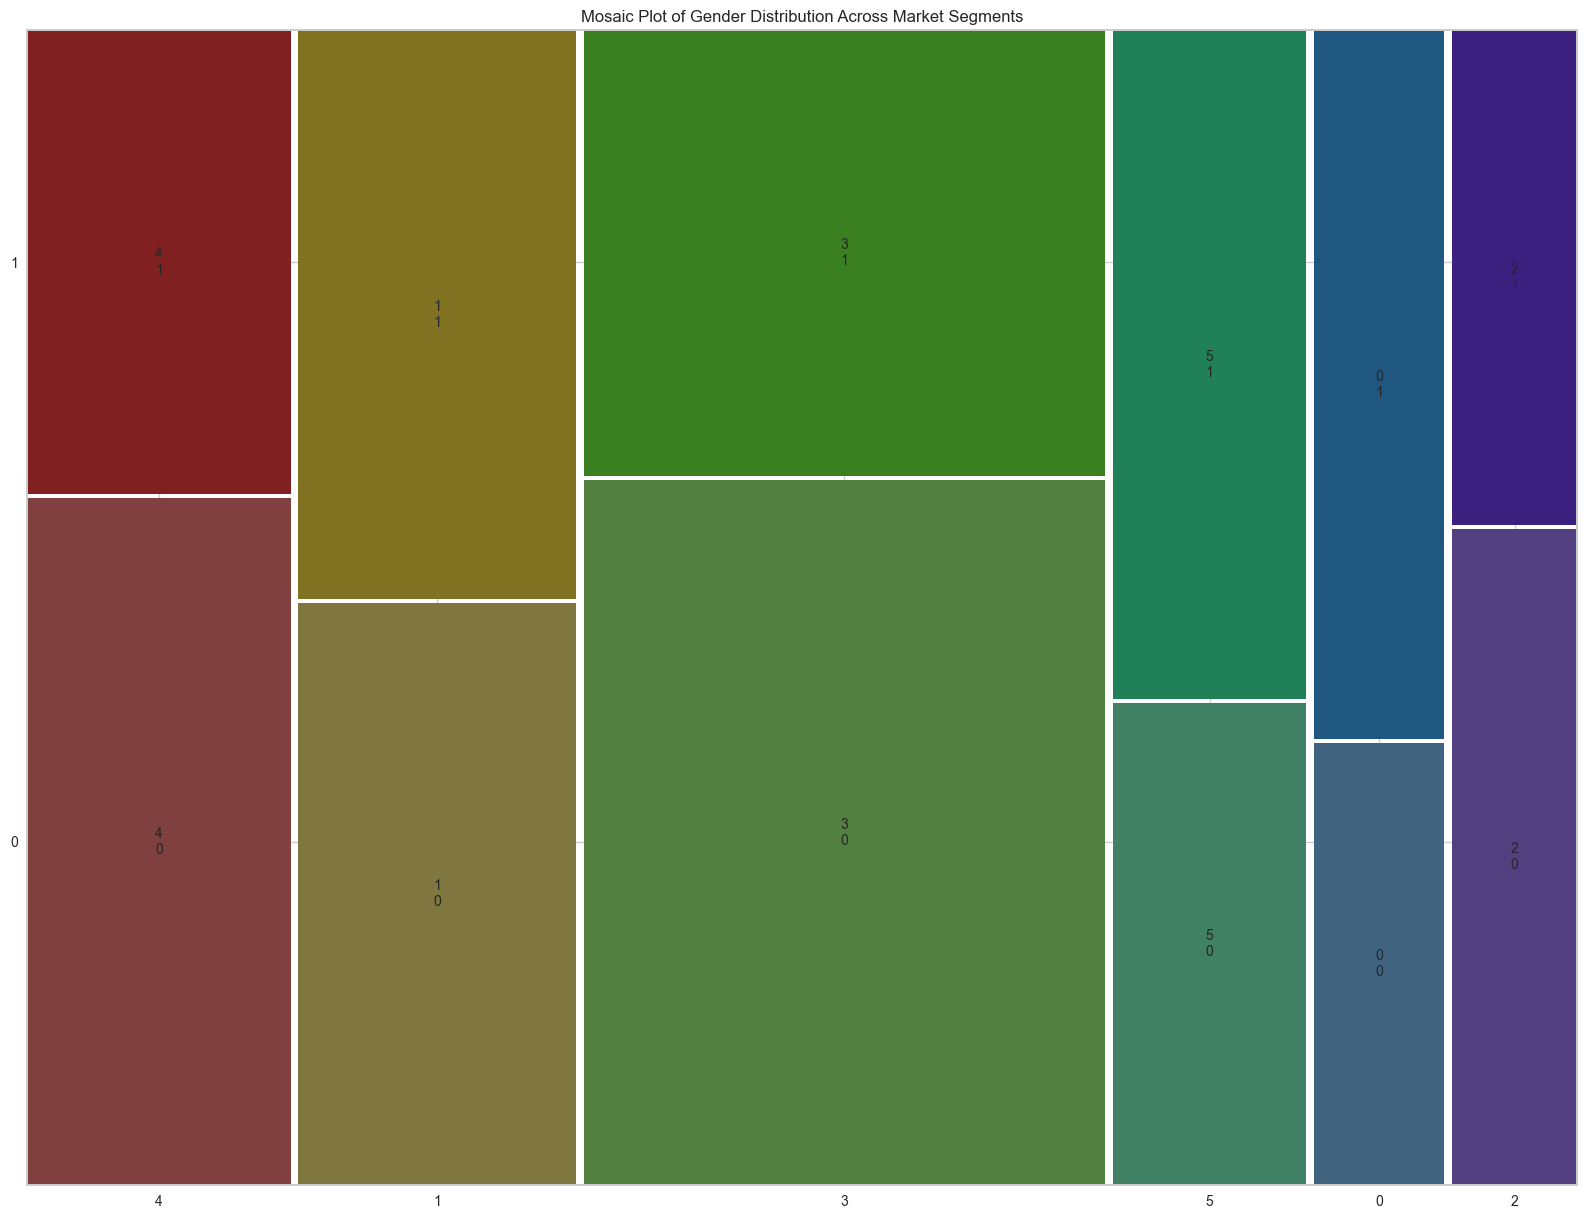

In [305]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

# Stacked bar chart
plt.figure(figsize=(10, 6))
C6_Gender.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Gender Distribution Across Market Segments')
plt.xlabel('Segment number')
plt.ylabel('Count')
plt.show()

# Mosaic plot
plt.figure(figsize=(8, 5))
mosaic(df, ['cluster_num', 'Gender'], title='Mosaic Plot of Gender Distribution Across Market Segments')
plt.show()


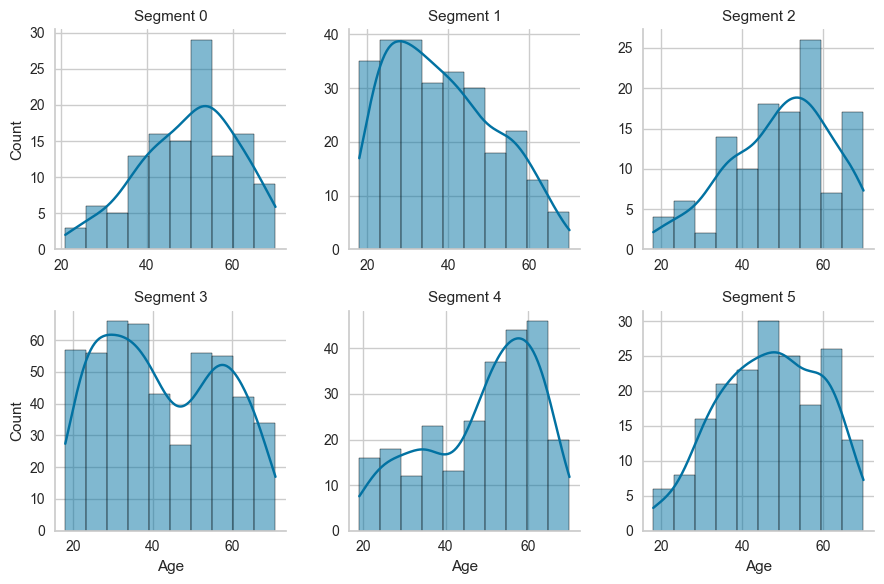

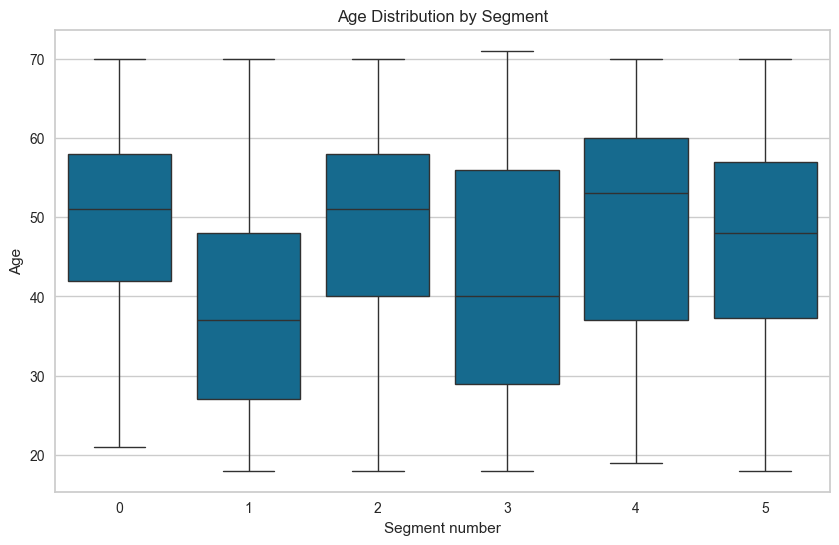

In [312]:
#Metric Descriptor Variables
# Assuming df contains your data with columns 'Age', 'cluster_num'

# Create histograms for Age by segment
g_age = sns.FacetGrid(df, col='cluster_num', col_wrap=3, sharex=False, sharey=False)
g_age.map(sns.histplot, 'Age', bins=10, kde=True)
g_age.set_titles("Segment {col_name}")
g_age.set_axis_labels("Age", "Count")
plt.show()

# Boxplot for Age by segment
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster_num', y='Age', data=df)
plt.xlabel('Segment number')
plt.ylabel('Age')
plt.title('Age Distribution by Segment')
plt.show()

In [334]:
# calculating the mean of 'VisitFrequency'
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.408000
1,1,2.576779
2,2,2.619835
3,3,2.608782
4,4,2.830040
5,5,2.709677


In [335]:
# calculating the mean of 'Like'
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,4.192000
1,1,3.749064
2,2,3.834711
3,3,3.928144
4,4,5.727273
5,5,7.155914


In [336]:
# calculating the mean of 'Gender'
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.616000
1,1,0.494382
2,2,0.429752
3,3,0.387226
4,4,0.403162
5,5,0.580645
